# Exploratory Data Analysis

##### Loading the Libraries and Dataset

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Load dataset
df = pd.read_csv("data/tech_salary_data.csv")

##### Adding Axis Formatting for Visualisation

In [ ]:
# Axis formatter (k = thousand, m = million)
def axis_fmt(x, pos):
    if abs(x)>=1e6: return f'{x/1e6:.1f}m'
    if abs(x)>=1e3: return f'{x/1e3:.0f}k'
    return str(int(x))
fmt = mtick.FuncFormatter(axis_fmt)

##### Details of the Dataset (No. of Rows and Columns)

In [ ]:
# Show the number of rows and columns in the dataset
print(f"This Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

This Dataset contains 62,642 rows and 24 columns.


##### Column Types and Missing Values of the Dataset

In [ ]:
# Show the column types and non-null counts
print("=== Columns and Data Types ===")
print(df.info(), "\n")

# Show the missing value counts
print("=== Missing Value Counts ===")
print(df.isnull().sum(), "\n")

=== Columns and Data Types ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61772 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40134 non-null  obje

##### Showing the Number of Levels/Unique Values for Categorical Variables

In [ ]:
# Show the number of levels in each categorical column
print("=== Levels of Categorical Columns ===")
cat_levels = df.select_dtypes(include=['object', 'category']).nunique(dropna=False)
print(cat_levels)

=== Levels of Categorical Columns ===
timestamp       62561
company          1632
level            2923
title              15
location         1050
tag              3058
gender              5
otherdetails    12841
Race                6
Education           6
dtype: int64


##### Descriptive/Summary Statistics for Numerical Variables

In [ ]:
# Descriptive Statistics for Nummeric Variables
print("=== Descriptive Statistics (Numeric) ===")
print(df.describe().T, "\n")

=== Descriptive Statistics (Numeric) ===
                           count           mean            std      min  \
totalyearlycompensation  62642.0  216300.373647  138033.746377  10000.0   
yearsofexperience        62642.0       7.204135       5.840375      0.0   
yearsatcompany           62642.0       2.702093       3.263656      0.0   
basesalary               62642.0  136687.281297   61369.278057      0.0   
stockgrantvalue          62642.0   51486.080733   81874.569391      0.0   
bonus                    62642.0   19334.746588   26781.292040      0.0   
cityid                   62642.0    9856.201989    6679.104563      0.0   
dmaid                    62640.0     616.097222     289.843390      0.0   
rowNumber                62642.0   41694.723732   24488.865879      1.0   
Masters_Degree           62642.0       0.245698       0.430504      0.0   
Bachelors_Degree         62642.0       0.201223       0.400917      0.0   
Doctorate_Degree         62642.0       0.028783       0.167

##### Correlation Matrix of Numerical Variables

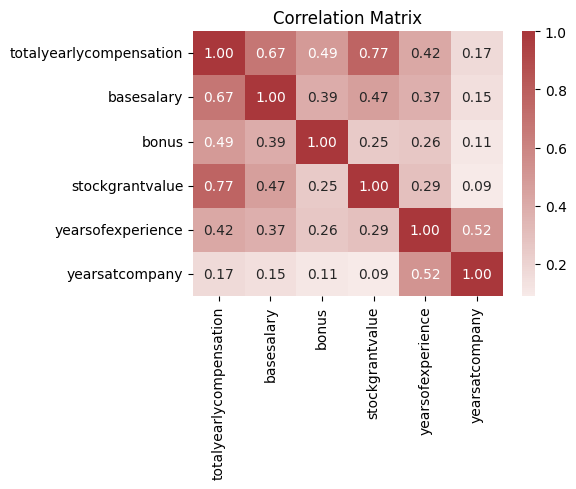

In [9]:
num_cols = [
    'totalyearlycompensation', 'basesalary', 'bonus', 'stockgrantvalue',
    'yearsofexperience', 'yearsatcompany'
]

corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="vlag", fmt=".2f", center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

##### Histograms and Boxplots of Numerical Values

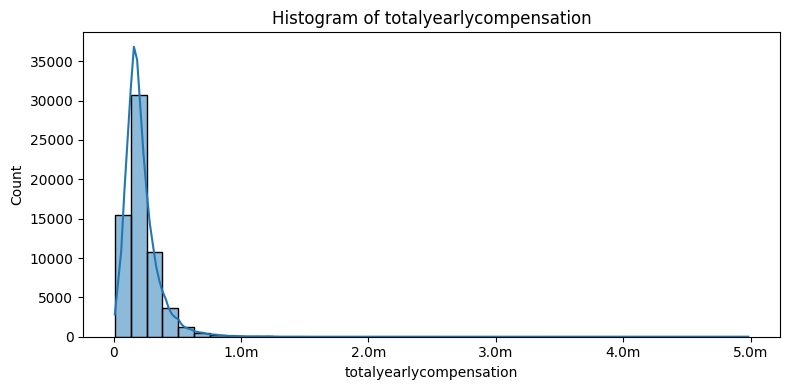

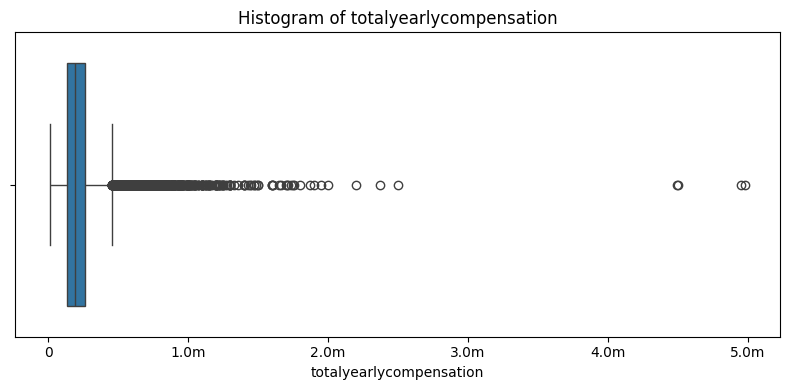

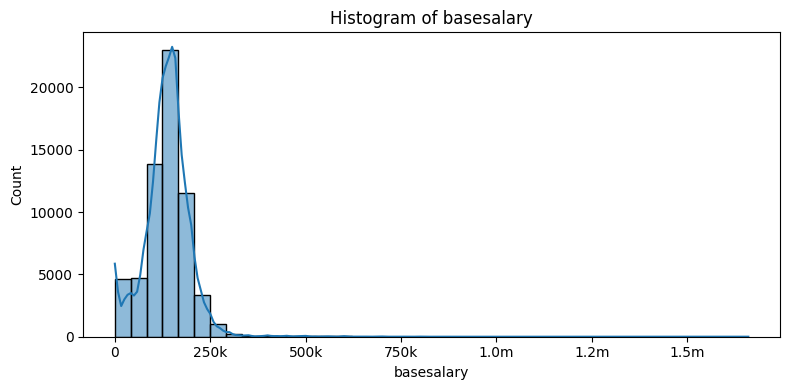

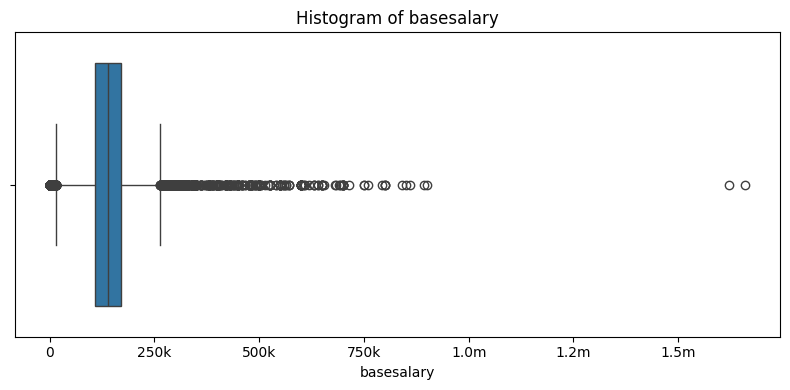

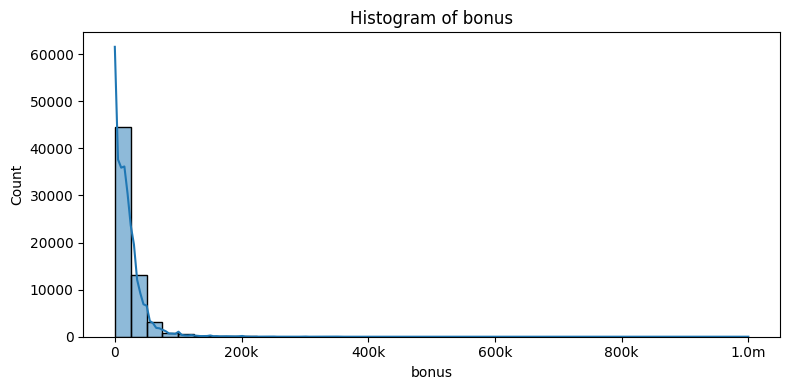

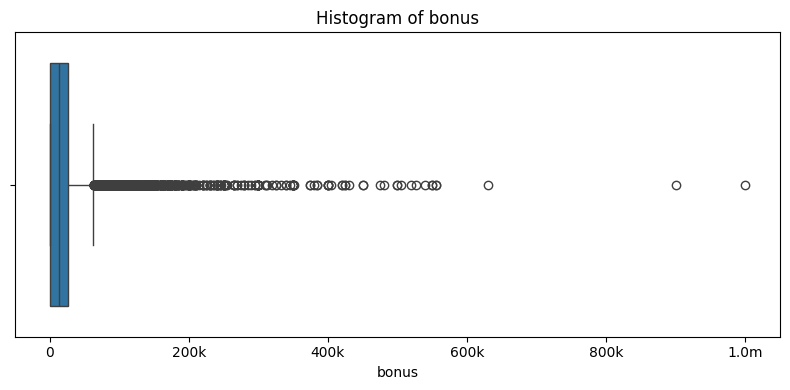

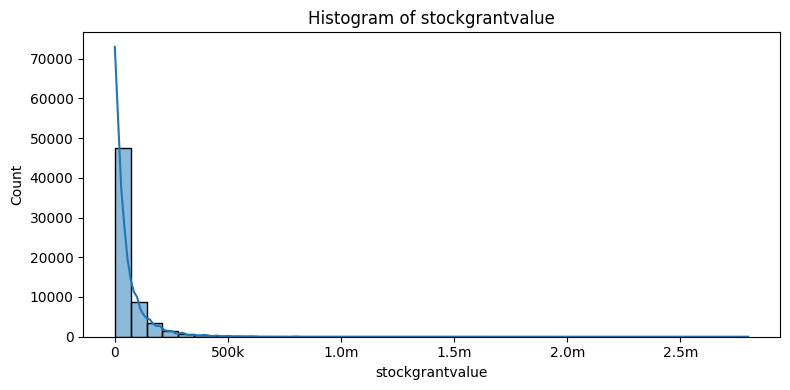

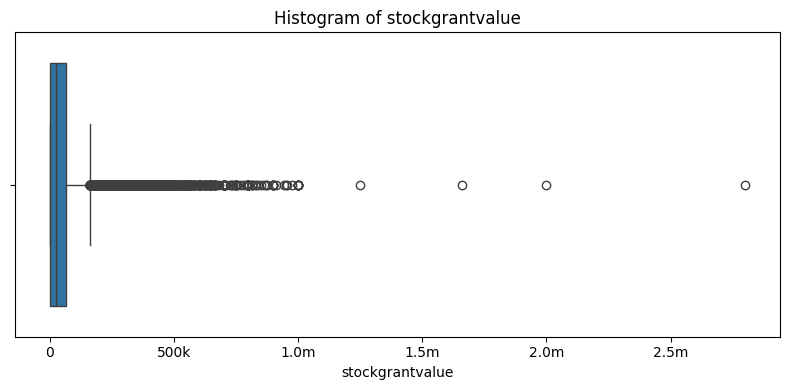

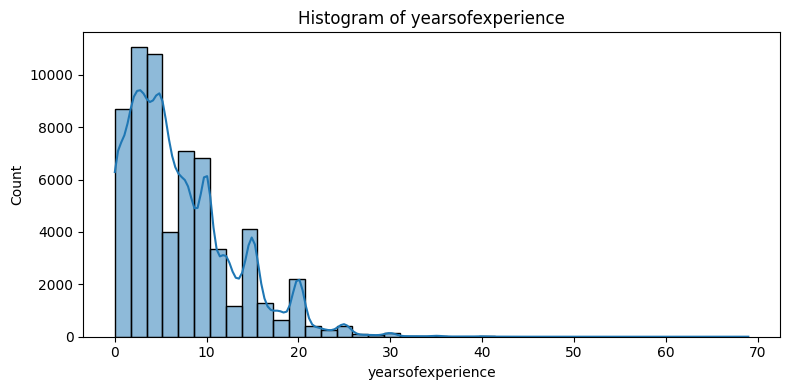

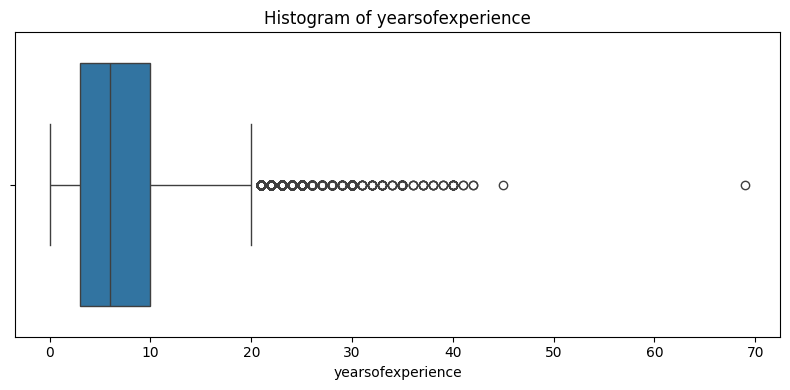

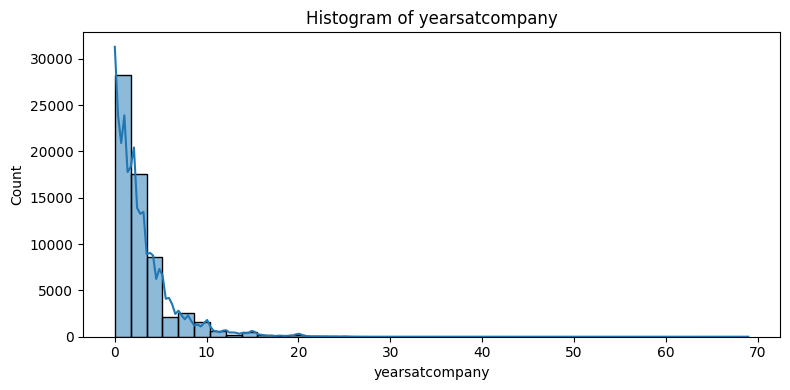

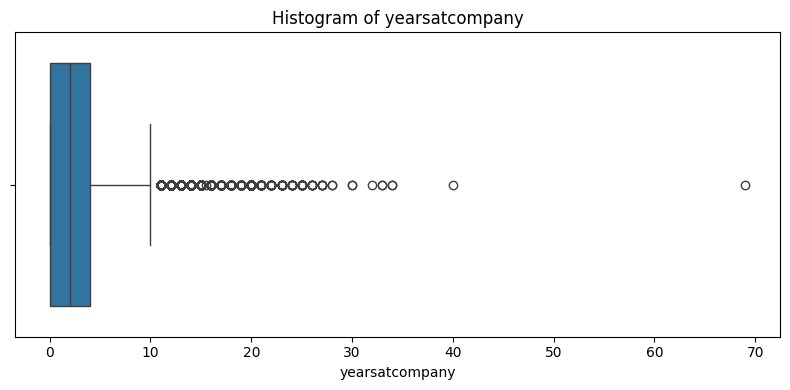

In [ ]:
for col in num_cols:
    # Histograms
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    plt.show()

    # Boxplots
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    plt.show()

##### Countplots for Key Categories
'level' variable is excluded as there is too many levels and inconsistencies.

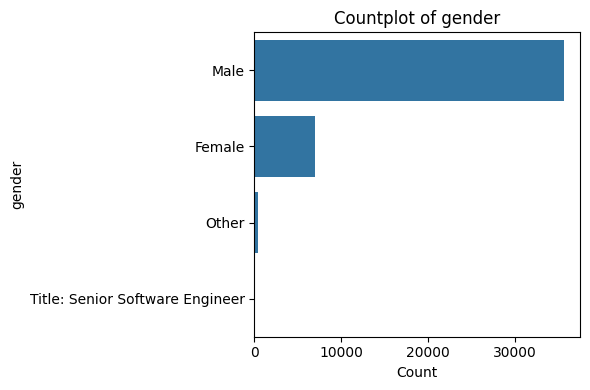

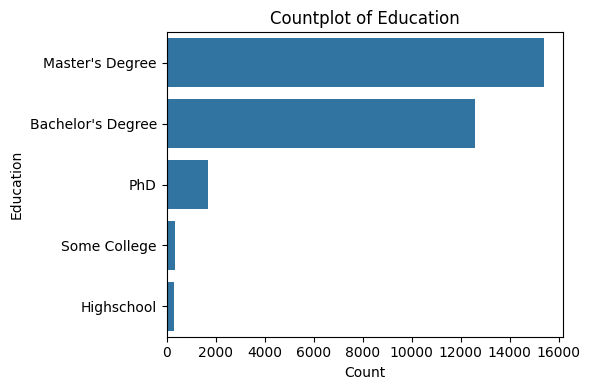

In [12]:
categorical_cols = ['gender', 'Education']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

##### Mean Total Yearly Compensation by Gender & Education

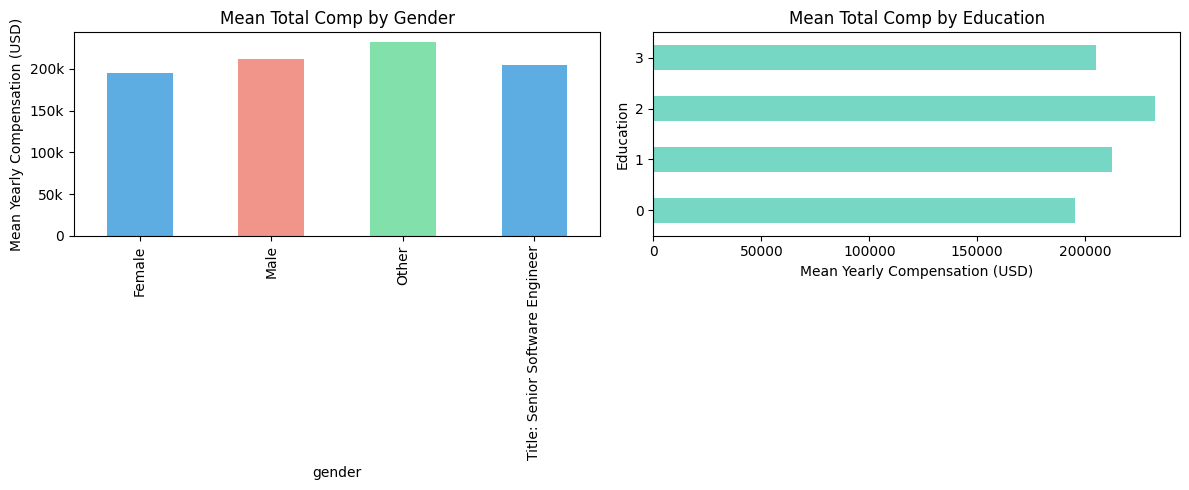

In [ ]:
# Mean Total Comp by Gender & Education
fig, axes = plt.subplots(1,2, figsize=(12,5))
grp = df.groupby("gender")["totalyearlycompensation"].mean()
grp.plot.bar(ax=axes[0], color=["#5DADE2", "#F1948A", "#82E0AA"])
axes[0].set_title("Mean Total Comp by Gender")
axes[0].set_ylabel("Mean Yearly Compensation (USD)")
axes[0].yaxis.set_major_formatter(fmt)

grp2 = df.groupby("Education")["totalyearlycompensation"].mean() \
        .sort_values()
grp.plot.barh(ax=axes[1], color="#76D7C4")
axes[1].set_title("Mean Total Comp by Education")
axes[1].set_ylabel("Education")
axes[1].set_xlabel("Mean Yearly Compensation (USD)")
axes[1].yaxis.set_major_formatter(fmt)

plt.tight_layout()
plt.show()

##### Boxplot of Total Year Compensation by Gender

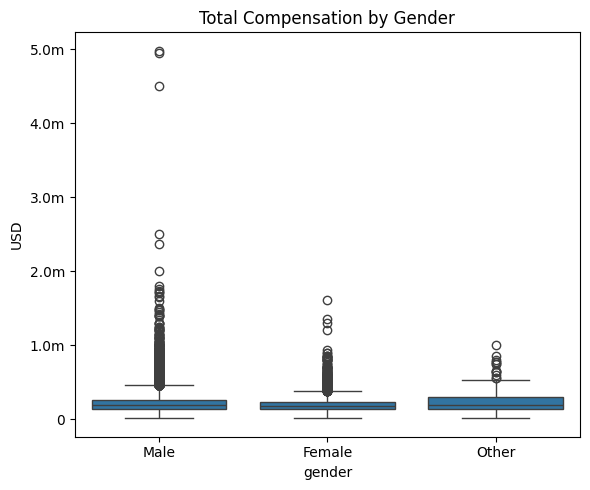

In [ ]:
# Total Year Comp by Gender
plt.figure(figsize=(6,5))
sns.boxplot(x="gender", y="totalyearlycompensation", data=df,
            order=["Male", "Female", "Other"])
plt.title("Total Compensation by Gender")
plt.ylabel("USD")
plt.gca().yaxis.set_major_formatter(fmt)
plt.tight_layout()
plt.show()